## Predict the demand of meals for a meal delivery company.
> Demand forecasting is a key component to every growing online business. Without proper demand forecasting processes in place, it can be nearly impossible to have the right amount of stock on hand at any given time. A food delivery service has to deal with a lot of perishable raw materials which makes it all the more important for such a company to accurately forecast daily and weekly demand.

> Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks — and push customers to seek solutions from your competitors. In this challenge, get a taste of demand forecasting challenge using a real dataset.

### Probleam Statement:
- Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

- The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, `the task is to predict the demand for the next 10 weeks (Weeks: 146-155)` for the center-meal combinations in the test set:  

1. Historical data of demand for a product-center combination (Weeks: 1 to 145)
2. Product(Meal) features such as category, sub-category, current price and discount
3. Information for fulfillment center like center area, city information etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test=pd.read_csv('test_QoiMO9B.csv')
train=pd.read_csv('train.csv')
meal_info=pd.read_csv('meal_info.csv')
center_info=pd.read_csv('fulfilment_center_info.csv')

In [3]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [4]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
print(test.shape)
print(train.shape)
print(meal_info.shape)
print(center_info.shape)

(32573, 8)
(456548, 9)
(51, 3)
(77, 5)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


### check out missing values

In [10]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [11]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [12]:
test.apply(lambda x: len(x.unique()))

id                       32573
week                        10
center_id                   77
meal_id                     51
checkout_price            1397
base_price                1179
emailer_for_promotion        2
homepage_featured            2
dtype: int64

In [13]:
train.apply(lambda x: len(x.unique()))

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

### spliting dataset for test and training purpous.

In [14]:
test=pd.merge(test,center_info, on='center_id')
test=pd.merge(test,meal_info, on='meal_id')


train=pd.merge(train,center_info, on='center_id')
train=pd.merge(train,meal_info, on='meal_id')

In [15]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [16]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [17]:
print(test.shape)
print(train.shape)

(32573, 14)
(456548, 15)


### Data visualization

##### Light Data Exploration¶
1) For numeric data
- Made histograms to understand distributions Corrplot

2) For Categorical Data
- Made bar charts to understand balance of classes

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


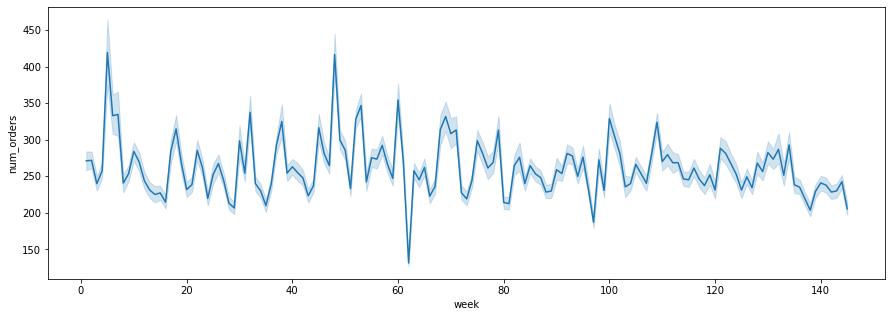

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(train['week'],train['num_orders'])
plt.show()

- Week no 60 has lowest orders
- Week no 5 and 48 has Highest orders

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


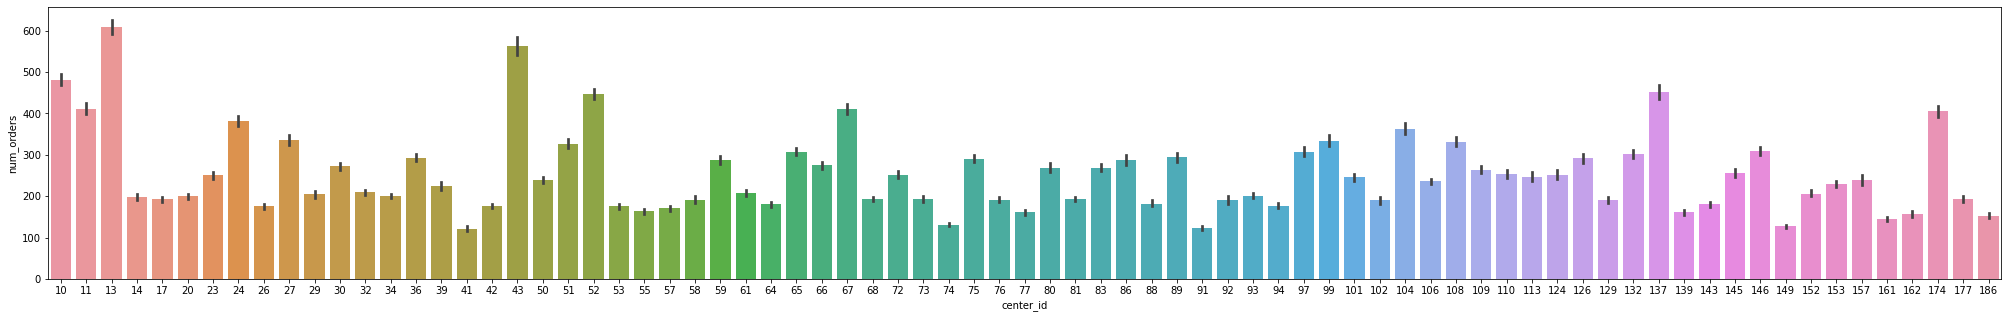

In [19]:
plt.figure(figsize=(35,5))
sns.barplot(train['center_id'],train['num_orders'])
plt.show()

- center id 13 has Highest no of orders
- center id 41 has Lowest no of orders

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


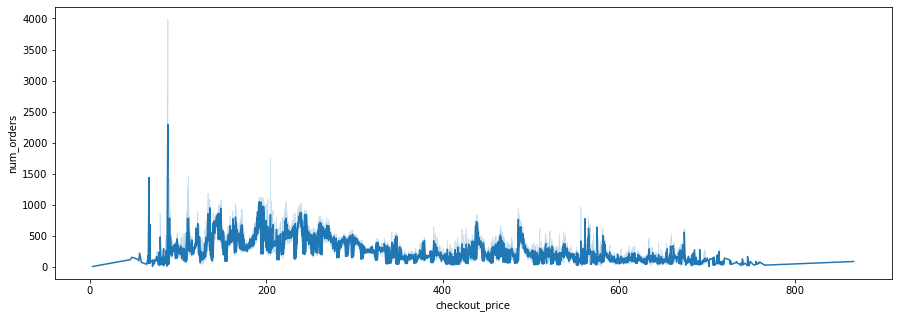

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(train['checkout_price'],train['num_orders'])
plt.show()

- If check-out price is high no of orders less

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


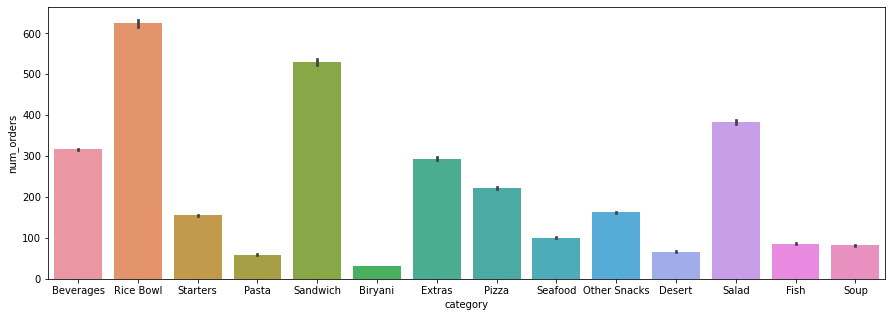

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(train['category'],train['num_orders'])
plt.show()

- Max order Rice Bowl and Sandwich Salad
- Min Order Briyani and Pasta

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


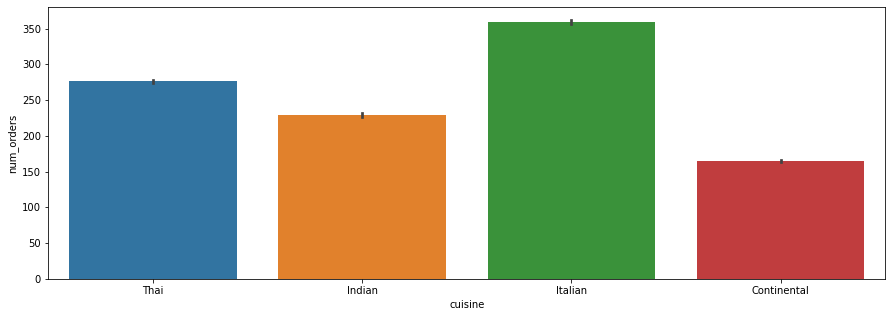

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(train['cuisine'],train['num_orders'])
plt.show()

- Max order Italian  and less order Continental

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


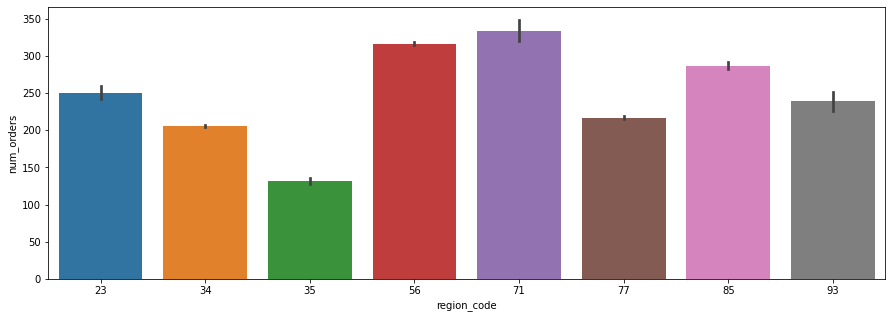

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(train['region_code'],train['num_orders'])
plt.show()

- Region Code 71 Has Maximum order.
- Where as region code 35 has Lowest order.

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


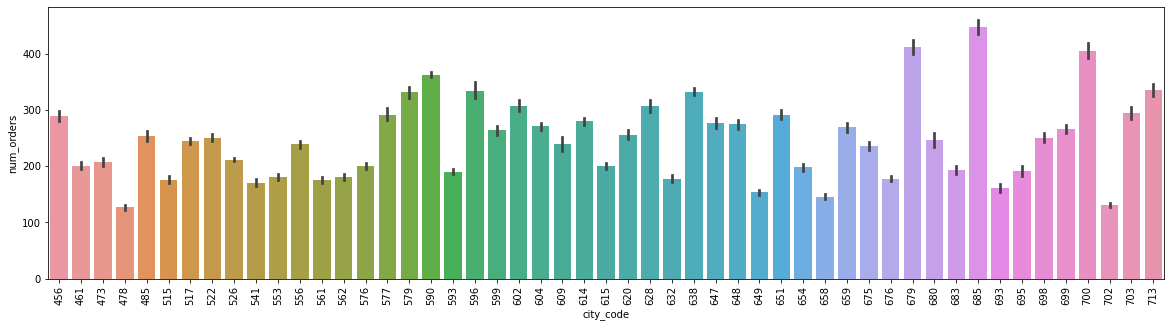

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(train['city_code'],train['num_orders'])
plt.xticks(rotation=90)
plt.show()

- City-code 685 ,679, 700 ,638,596,590 and 579 there no_of order more than 300.

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


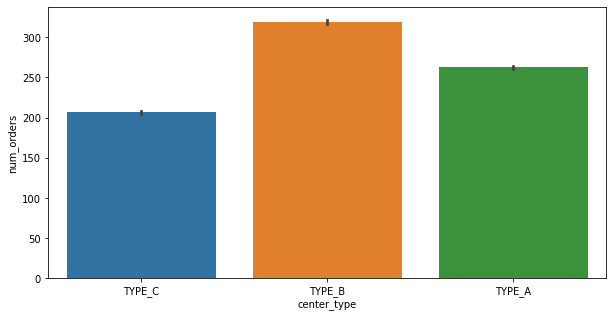

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(train['center_type'],train['num_orders'])
plt.show()

- Type B generte more no of orders as compared to others.

E:\python Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


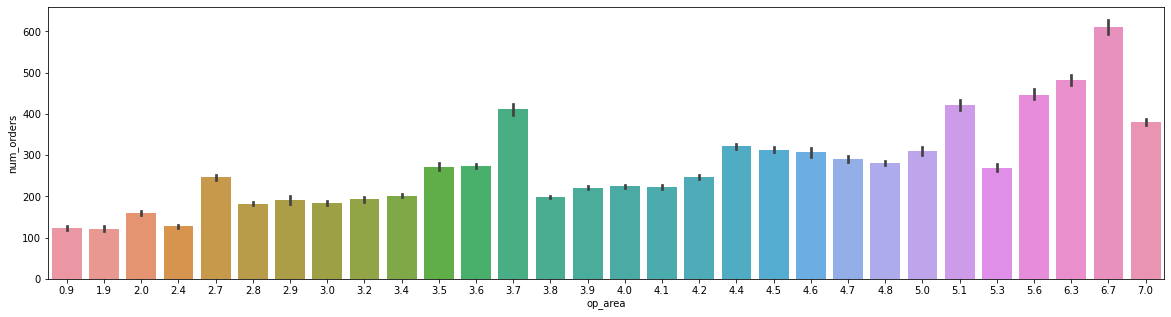

In [26]:
plt.figure(figsize=(20,5))
sns.barplot(train['op_area'],train['num_orders'])
plt.show()

- NO direct relationship b/w no of orders and op_area

In [27]:
corr=train.corr()

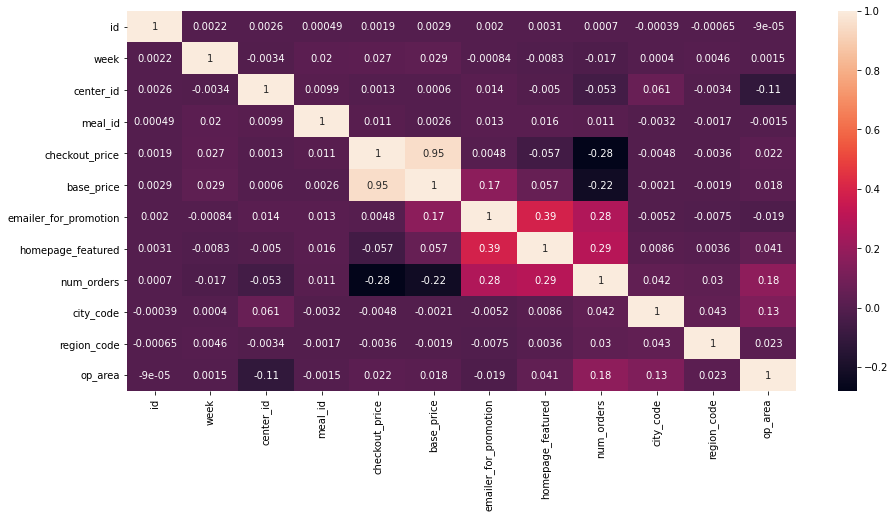

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)
plt.show()

In [29]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lb1 = LabelEncoder()
train['center_type'] = lb1.fit_transform(train['center_type'])

lb2 = LabelEncoder()
train['category'] = lb1.fit_transform(train['category'])

lb3 = LabelEncoder()
train['cuisine'] = lb1.fit_transform(train['cuisine'])

In [32]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type                int32
op_area                  float64
category                   int32
cuisine                    int32
dtype: object

In [37]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


-- sns.pairplot(train)

In [41]:
f_train = train.loc[:,['week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured','num_orders']]
final_train = pd.get_dummies(f_train)

In [42]:
features = final_train.iloc[:,1:].values
label = final_train.iloc[:,:1].values

### Model Buliding
- here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1.LinearRegression 

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=1705)

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [47]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.0015433204942375545
MSE score  : 1718.0145317596616
RMSE:  41.44893884962149


2. DecisionTreeRegressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=1956)
DT = DecisionTreeRegressor(max_depth=3,random_state=0)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

In [49]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.04011493478770867
MSE score  : 1656.6387674496568
RMSE:  40.7018275689146


3.RandomForest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=33)
RF = RandomForestRegressor(max_depth=3, random_state=0)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

<ipython-input-51-0ed180fa0b6e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


In [52]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.042201230776653276
MSE score  : 1650.0665569114594
RMSE:  40.6210112738649


##### Conclusion
- I will choose a RandomForestRegressor algorithm for this dataset.

RandomForestRegressor score:

RMSE score : 40.6210112738649

#### Applying Algorithm
-- before applying the algorithm to the test dataset. we should make it a complete numeric dataset. the following setups are below mentioned.

- columns center_id and meal_id has many categorical values.
- to manage categorical columns we using function their create new few sub-categories.
- using get_dummies() function.
- here our data is ready to apply an algorithm on it.

In [54]:
test.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [ ]:
center_id_val_index_n = center_id(test.center_id) 
test.center_id = center_id_val_index_n

meal_id_val_index_n = meal_id(test.meal_id)
test.meal_id = meal_id_val_index_n

In [55]:
f_test = test.loc[:,['week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured']]
final_test = pd.get_dummies(f_test)

In [56]:
test_predict = RF.predict(final_test)

E:\python Data science\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [57]:
test['num_orders'] = test_predict

In [58]:
sample =  test.loc[:,['id','num_orders']]

In [59]:
sample.to_csv('sample_submission.csv',index=False)